In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [3]:
rs = 10

# Load a dataset

In [4]:
# import a dataset
df = pd.read_csv("./task/training.csv")
X_test = pd.read_csv("./task/testing.csv")
y_test = pd.read_csv("./task/answer.csv")

# Exploratory Data Analysis (EDA)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
51,6.7,3.1,5.6,2.4,0
49,6.3,3.3,6.0,2.5,0
33,7.1,3.0,5.9,2.1,0
18,6.5,3.0,5.5,1.8,0
48,6.4,2.8,5.6,2.2,0


In [7]:
df.shape

(64, 5)

In [8]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [9]:
df['target'].value_counts()

0    37
1    27
Name: target, dtype: int64

In [10]:
df.describe(exclude=['int64'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,64.000000,64.000000,64.000000,64.000000
mean,6.293750,2.906250,5.025000,1.746875
std,0.676094,0.303354,0.794825,0.433139
min,4.900000,2.200000,3.300000,1.000000
25%,5.700000,2.700000,4.475000,1.400000
50%,6.300000,2.950000,5.100000,1.800000
75%,6.700000,3.025000,5.600000,2.100000
max,7.900000,3.800000,6.700000,2.500000


In [11]:
pd.DataFrame(df.groupby(by=['target']).describe()).stack().unstack(0)

sepal length (cm)            sepal width (cm)             \
target                 0          1                0          1   
count          37.000000  27.000000        37.000000  27.000000   
mean            6.545946   5.948148         2.989189   2.792593   
std             0.663574   0.532317         0.314275   0.251038   
min             4.900000   4.900000         2.200000   2.300000   
25%             6.100000   5.600000         2.800000   2.600000   
50%             6.500000   5.700000         3.000000   2.900000   
75%             6.900000   6.350000         3.200000   3.000000   
max             7.900000   7.000000         3.800000   3.200000   

       petal length (cm)            petal width (cm)             
target                 0          1                0          1  
count          37.000000  27.000000        37.000000  27.000000  
mean            5.559459   4.292593         2.051351   1.329630  
std             0.507970   0.458195         0.279505   0.183586  
min             4.500000   3.300000         1.400000   1.000000  
25%             5.100000   4.000000         1.900000   1.250000  
50%             5.600000   4.400000         2.000000   1.300000  
75%             5.900000   4.600000         2.300000   1.500000  
max             6.700000   5.100000         2.500000   1.700000

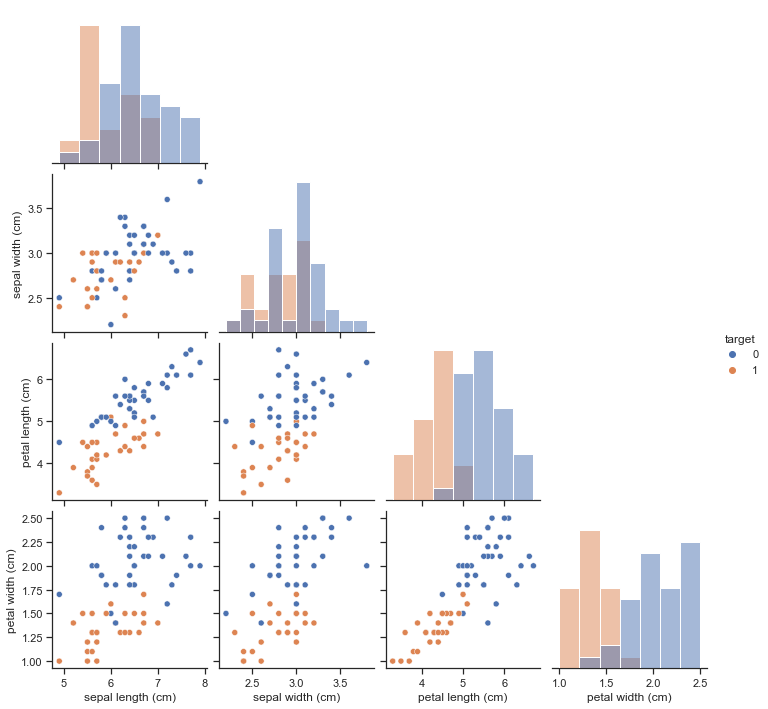

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(df, corner=True, diag_kind="hist", hue="target")

# Training

### Training dataset

In [13]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [14]:
X = df.iloc[:,[2,3]] #X = df.iloc[:,:-1] #X = df.iloc[:,2:4]
y = df.iloc[:,-1]

### Z-score Normalization

In [15]:
scaler = StandardScaler().fit(X) 
print(scaler.mean_)
print(np.sqrt(scaler.var_))
X_scaled = scaler.transform(X)

[5.025    1.746875]
[0.78859051 0.42974147]


In [16]:
X_test_scaled = scaler.transform(X_test.iloc[:,[2,3]])

In [17]:
# scaled 
print('(scaled) mean: ', np.round(X_scaled.mean(axis=0),5))
print('(scaled) sd: ', X_scaled.std(axis=0))

(scaled) mean:  [-0. -0.]
(scaled) sd:  [1. 1.]


### Splitting dataset

In [18]:
X_train, X_validation, y_train, y_validation = train_test_split(X_scaled,y, test_size=0.2, random_state=rs)

In [19]:
X_train.shape

(51, 2)

In [20]:
X_test.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,6.3,2.9,5.6,1.8
14,6.7,2.5,5.8,1.8
8,6.0,3.4,4.5,1.6
10,6.9,3.1,5.4,2.1
15,6.0,2.2,4.0,1.0


In [21]:
y_train.value_counts()

0    29
1    22
Name: target, dtype: int64

In [22]:
X_validation.shape

(13, 2)

In [23]:
y_validation.value_counts()

0    8
1    5
Name: target, dtype: int64

### Ensemble learning

In [24]:
# initialization
Per_clf = Perceptron()
LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()
voting_clf = VotingClassifier(estimators=[('Per', Per_clf), ('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
# optimization
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Per', Perceptron()), ('SVC', SVC()),
                             ('DTree', DecisionTreeClassifier()),
                             ('LogReg', LogisticRegression())])

In [25]:
# performance
y_pred_val = voting_clf.predict(X_validation)
print(metrics.accuracy_score(y_pred_val, y_validation))

0.8461538461538461


In [26]:
# prediction
y_pred_test = voting_clf.predict(X_test_scaled)
print(metrics.accuracy_score(y_pred_test, y_test))

1.0


### Decision boundary

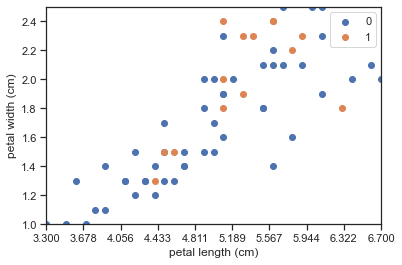

In [28]:
x_ticks = np.linspace(min(X.iloc[:,0]),max(X.iloc[:,0]),10)
ax = plt.subplot(1,1,1)
ax.set_xticks(x_ticks)
ax.set_xlim(min(X.iloc[:,0]),max(X.iloc[:,0]))
ax.set_ylim(min(X.iloc[:,1]),max(X.iloc[:,1]))
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
plt.scatter(X.iloc[:50,0],X.iloc[:50,1],label='0')
plt.scatter(X.iloc[50:,0],X.iloc[50:,1],label='1')
plt.legend(loc = 'best')